**Import thư viện**

In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

**Lọc và lấy dữ liệu**

In [162]:
df = pd.read_csv('./iris.data', header=None)
X = df.iloc[:,[0,1]].values
y = df.iloc[:,4].values

**Đồ thị biểu diễn với chiều dài và rộng của đài hoa iris**

Number of classes:3


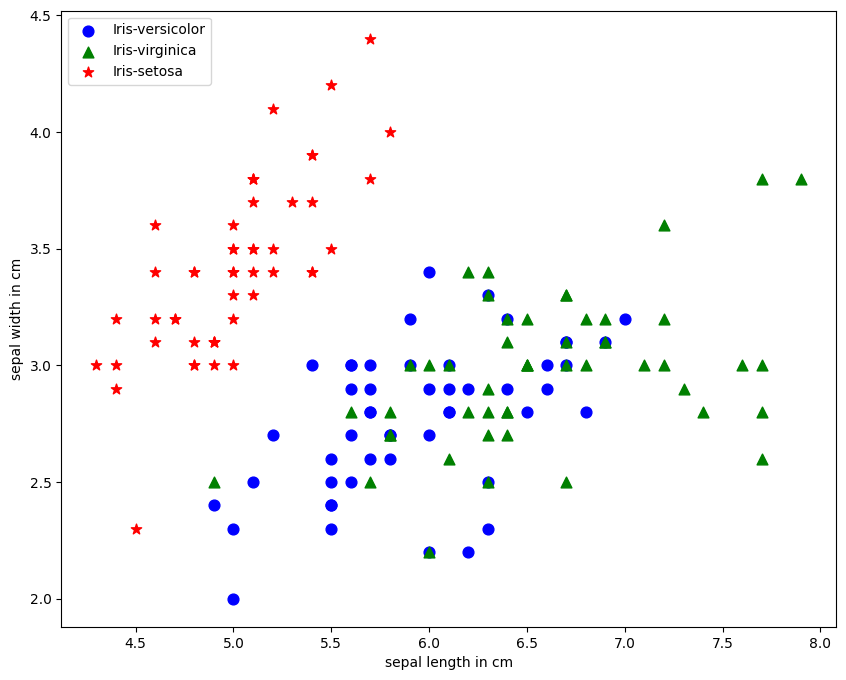

In [163]:
n_class = len(set(y))
target_names = list(set(y))
print("Number of classes:" + str(n_class))
plt.figure(figsize=(10, 8))

# convert target name from string to integer
cy = np.array(list(map(lambda item: ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'].index(item), y))) 

for i, c, s in (zip(range(n_class), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = cy == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], color=c, marker=s, s=60, label=target_names[i])

plt.legend(loc=2, scatterpoints=1)
plt.xlabel("sepal length in cm")
plt.ylabel("sepal width in cm")
plt.show()


**Splitting Data**

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

**Train model**

In [165]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

**Dự đoán và đánh giá mô hình**

In [166]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


Phần này chúng ta sẽ xem độ chính xác của model đã train thông qua confuion matrix và visualize đường bao dữ liệu dự đoán của mô hình.

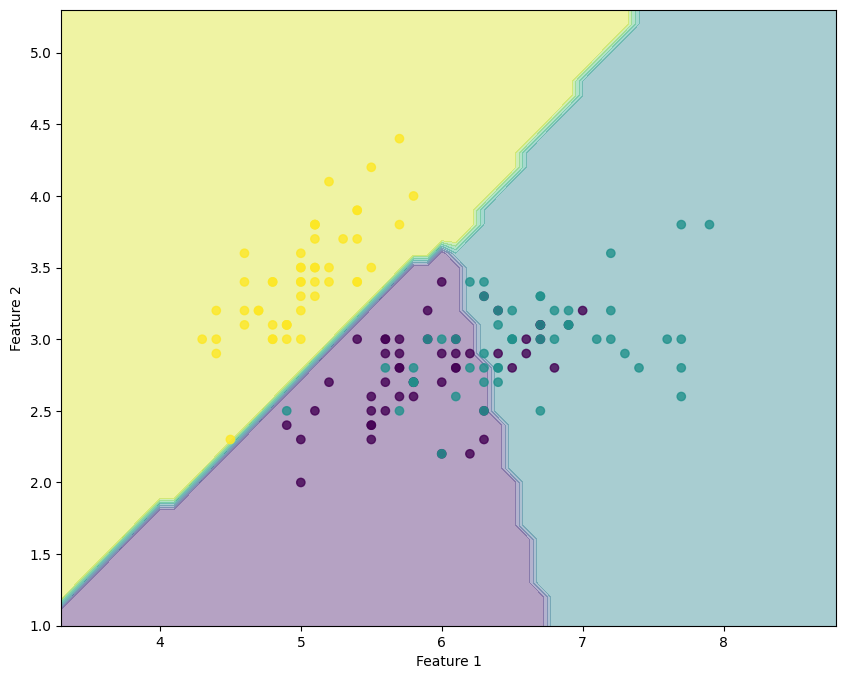

In [182]:
def plot_desicion_boundary(X, y, clf, title = None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(list(map(lambda item: ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'].index(item), Z)))
    Z = Z.reshape(xx.shape)

    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    plt.show()

plot_desicion_boundary(X, cy, clf)